In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn import svm

In [3]:
import csv
filename = "train.csv"
fields = []
x = []
y = []
z = []
with open(filename, 'r') as csvfile:
    # creating a csv reader object
    csvreader = csv.reader(csvfile)
     
    # extracting field names through first row
    fields =csvreader.next()
    for row in csvreader:
        x.append(float(row[3])-float(row[5]))
        y.append(float(row[4])-float(row[6]))   
        z.append(float(row[7]))


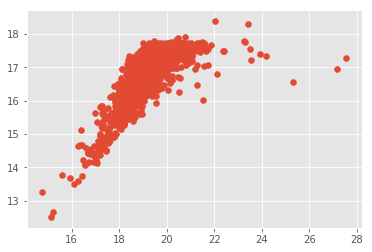

In [4]:
plt.scatter(x,y)
plt.show()

In [5]:
result = [None]*(len(x)+len(x))
result[::2] = x
result[1::2] = y
X = np.reshape(result, (1000,2))

In [6]:
clf = svm.SVC(kernel='linear', C = 1.0)

In [7]:
clf.fit(X,z)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

[-2.3457481   2.98113753]
0.786863428544


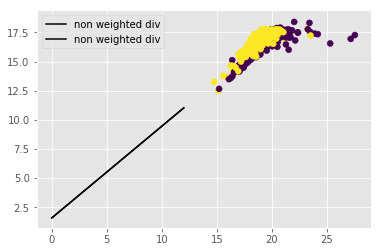

In [9]:
w = clf.coef_[0]
print(w)

a = -w[0] / w[1]

xx = np.linspace(0,12)
yy = a * xx - clf.intercept_[0] / w[1]
print a

h0 = plt.plot(xx, yy, 'k-', label="non weighted div")
#print('r = '+a+'u-'+clf.intercept_[0] / w[1])
plt.scatter(X[:, 0], X[:, 1], c = z)
plt.legend()
plt.show()

In [ ]:
filename = "test.csv"
fields = []
values = []
t = []
with open(filename, 'r') as csvfile:
    # creating a csv reader object
    csvreader = csv.reader(csvfile)
     
    # extracting field names through first row
    fields =csvreader.next()
    for row in csvreader:
        #print row
        t.append(float(row[3])-float(row[5]))
        t.append(float(row[4])-float(row[6]))
        values.append(float(row[7]))
    #print t
    test = np.array(t)
   #print test
    test = np.reshape(test, (250,2))
    
    pred = (clf.predict(test))
    print pred

In [ ]:
correct = np.array(values)
print correct

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(correct, pred)